In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchwisdom.tabular import datasets

import pandas as pd
from torch.utils.data import DataLoader
from torchwisdom.tabular.trainer import *
from torchwisdom.tabular.collector import *
from torchwisdom.core.callback import AccuracyCallback, AccuracyTopKCallback, MSECallback, AccuracyRegressionCallback
import torchvision.transforms as transforms
import torchwisdom.tabular.transforms as ttrans
from torchwisdom.core.nn import functional as N

In [48]:
data = categorical_dataset('data/iris.csv', target_columns='classes')

In [49]:
model = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Linear(128, 3)
)

epoch,trn_loss,val_loss,trn_acc,val_acc,time,remain
1,0.860784,0.972865,0.474330,0.566667,0:00:00.12,0:00:01.16
2,0.255242,0.974714,0.926339,0.666667,0:00:00.15,0:00:01.25
3,0.131155,0.780093,0.949777,0.633333,0:00:00.13,0:00:00.93
4,0.078815,0.602783,0.968750,0.700000,0:00:00.18,0:00:01.23
5,0.058634,0.404172,0.967634,0.800000,0:00:00.12,0:00:00.56
6,0.059529,0.267326,0.974330,0.866667,0:00:00.13,0:00:00.46
7,0.051671,0.297589,0.983259,0.866667,0:00:00.11,0:00:00.15
8,0.074946,0.189385,0.991071,0.900000,0:00:00.11,0:00:00.02
9,0.046116,0.078433,0.983259,0.966667,0:00:00.12,0:0
10,0.085884,0.068678,0.973214,0.966667,0:00:00.13,0:0


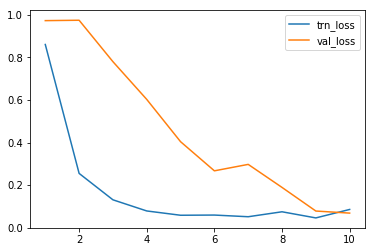

In [50]:
trainer = classifier_trainer(data, model)
trainer.fit(10, lr=0.02)

In [51]:
feat, targ = next(iter(data.validloader))

In [52]:
trainer.predict(tensor_data=feat[:10], target=targ[:10], show_table=True, use_topk=True, kval=3)

,sepal_length,sepal_width,petal_length,petal_width,classes_truth,classes_predict_top1,classes_predict_top2,classes_predict_top3
0,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica (95.6284%),Iris-versicolor (4.3579%),Iris-setosa (0.0137%)
1,6.9,3.2,5.7,2.3,Iris-virginica,Iris-virginica (99.9483%),Iris-versicolor (0.0500%),Iris-setosa (0.0017%)
2,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa (99.9981%),Iris-versicolor (0.0018%),Iris-virginica (0.0001%)
3,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa (99.9981%),Iris-versicolor (0.0018%),Iris-virginica (0.0001%)
4,4.9,2.5,4.5,1.7,Iris-virginica,Iris-virginica (82.3650%),Iris-versicolor (17.5904%),Iris-setosa (0.0446%)
5,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor (99.7215%),Iris-virginica (0.2521%),Iris-setosa (0.0264%)
6,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor (84.1977%),Iris-virginica (15.7401%),Iris-setosa (0.0623%)
7,7.2,3.0,5.8,1.6,Iris-virginica,Iris-virginica (78.5212%),Iris-versicolor (21.4230%),Iris-setosa (0.0558%)
8,5.7,4.4,1.5,0.4,Iris-setosa,Iris-setosa (99.9999%),Iris-versicolor (0.0001%),Iris-virginica (0.0000%)
9,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor (99.3941%),Iris-virginica (0.5407%),Iris-setosa (0.0653%)
